# The classification goal is to predict the likelihood of a liability customer buying personal loans

Load basic libraries

In [791]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [792]:
pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [793]:
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [794]:
pdata.shape

(5000, 14)

In [795]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Exploratory Data Analysis

In [796]:
pdata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [797]:
pdata.isnull().values.any()

False

Data for all columns and rows are present, no null values

In [798]:
pdata.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [799]:
pdata["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

Only 480 customers who opted for Personal Loan 

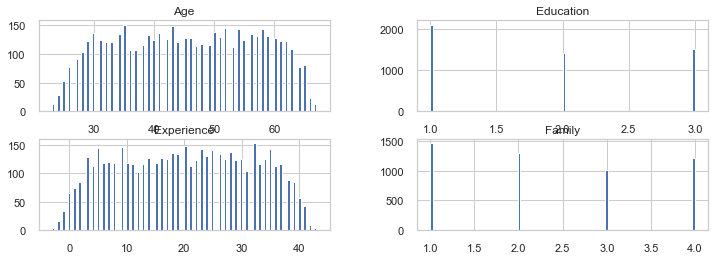

In [800]:
columns = ["Age","Experience","Family","Education"]
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

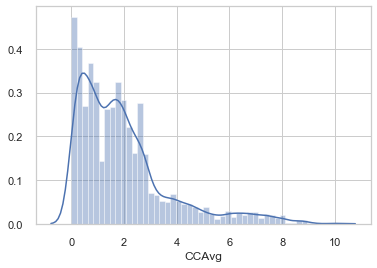

In [801]:
sns.set(style="whitegrid", color_codes=True)
sns.distplot(pdata["CCAvg"])

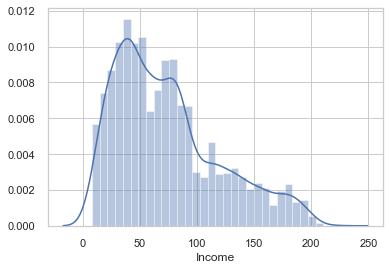

In [802]:
sns.distplot(pdata["Income"])

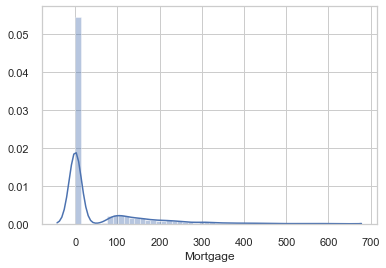

In [803]:
sns.distplot(pdata["Mortgage"])

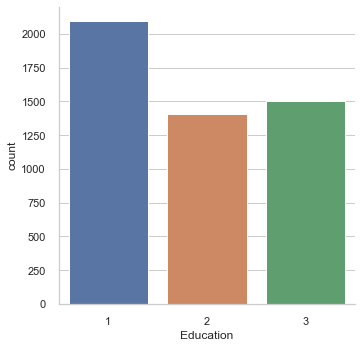

In [804]:
#For categorical values, count plot would be good 
sns.catplot(x="Education", kind="count", data= pdata, orient="h")
#More customers are undergrad

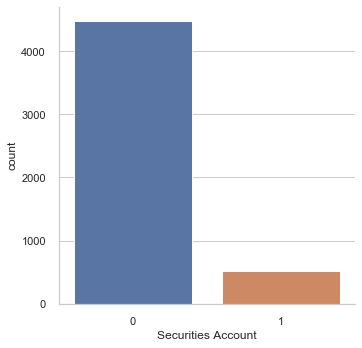

In [805]:
sns.catplot(x="Securities Account", kind="count", data= pdata, orient="h")

In [806]:
#Very less customers are having securites account

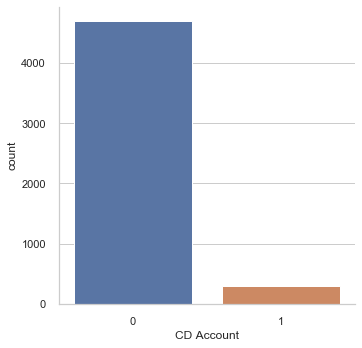

In [807]:
sns.catplot(x="CD Account", kind="count", data= pdata, orient="h")

In [808]:
#Less customer with Deposit Account

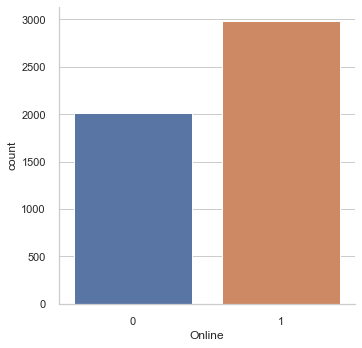

In [809]:
sns.catplot(x="Online", kind="count", data= pdata, orient="h")

In [810]:
#More customers are using Online facility

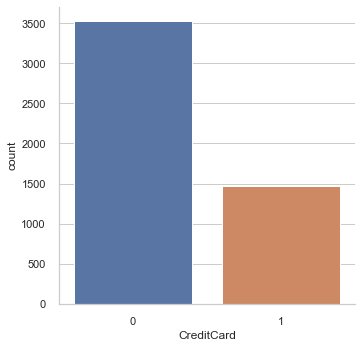

In [811]:
sns.catplot(x="CreditCard", kind="count", data= pdata, orient="h")

In [812]:
#Relatively less customers are having CreditCard assigned against them

In [813]:
grouped = pdata.groupby(['Personal Loan','CD Account'])
grouped.size()

Personal Loan  CD Account
0              0             4358
               1              162
1              0              340
               1              140
dtype: int64

In [814]:
# Having CD Account is not influencing customer for Personal Loan

In [815]:
grouped = pdata.groupby(['Personal Loan','CreditCard'])
grouped.size()

Personal Loan  CreditCard
0              0             3193
               1             1327
1              0              337
               1              143
dtype: int64

In [816]:
# Having CreditCard issued by Universal bank is not influencing customer for Personal Loan

In [817]:
grouped = pdata.groupby(['Personal Loan','Online'])
grouped.size()

Personal Loan  Online
0              0         1827
               1         2693
1              0          189
               1          291
dtype: int64

In [818]:
# Having done transactions Online is not influencing customer for Personal Loan

In [819]:
grouped = pdata.groupby(['Personal Loan','Securities Account'])
grouped.size()

Personal Loan  Securities Account
0              0                     4058
               1                      462
1              0                      420
               1                       60
dtype: int64

In [820]:
# Having done Securities Account is not influencing customer for Personal Loan

In [821]:
# Checking how many customers are having 0 mortgage and they opted for Personal Loan
pdata[(pdata.Mortgage == 0) & (pdata["Personal Loan"] == 1)].count()

ID                    312
Age                   312
Experience            312
Income                312
ZIP Code              312
Family                312
CCAvg                 312
Education             312
Mortgage              312
Personal Loan         312
Securities Account    312
CD Account            312
Online                312
CreditCard            312
dtype: int64

In [822]:
# Checking how many customers are having no experience and they opted for Personal Loan
pdata[(pdata.Experience == 0) & (pdata["Personal Loan"] == 1)].count()

ID                    7
Age                   7
Experience            7
Income                7
ZIP Code              7
Family                7
CCAvg                 7
Education             7
Mortgage              7
Personal Loan         7
Securities Account    7
CD Account            7
Online                7
CreditCard            7
dtype: int64

In [823]:
pdata[(pdata.Experience == 0) & (pdata["Personal Loan"] == 1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
151,152,26,0,132,92834,3,6.50,3,0,1,0,0,0,1
160,161,29,0,134,95819,4,6.50,3,0,1,0,0,0,0
1337,1338,26,0,179,92028,4,2.10,2,0,1,0,0,0,0
3084,3085,26,0,129,90028,3,0.70,2,0,1,0,0,0,0
3747,3748,26,0,83,91360,3,3.90,2,0,1,0,0,1,0
4282,4283,26,0,195,92093,3,6.33,3,0,1,1,1,1,0
4425,4426,26,0,164,95973,2,4.00,3,301,1,0,0,1,0


In [824]:
pdata[(pdata.Age == 26) & (pdata.Experience >2)].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [825]:
#Distribution for Target Column i.e. Personal Loan

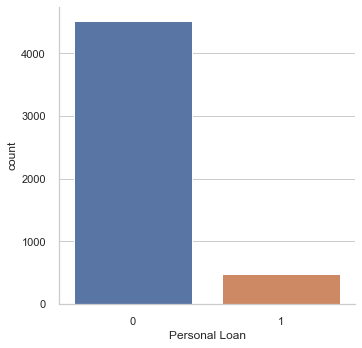

In [826]:
sns.catplot(x="Personal Loan", kind="count", data= pdata, orient="h")

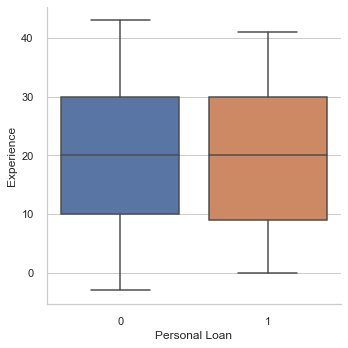

In [827]:
sns.catplot(x="Personal Loan", y="Experience", kind="box", data=pdata)

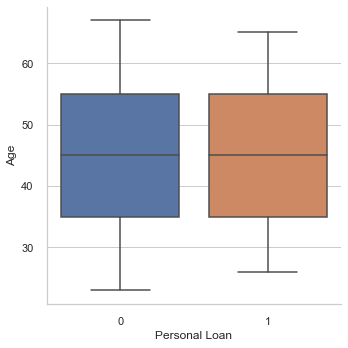

In [828]:
sns.catplot(x="Personal Loan", y="Age", kind="box", data=pdata)

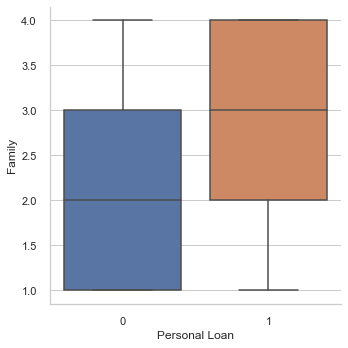

In [829]:
sns.catplot(x="Personal Loan", y="Family", kind="box", data=pdata)

In [830]:
#People with more family members tend to apply for personal loan, with different Education

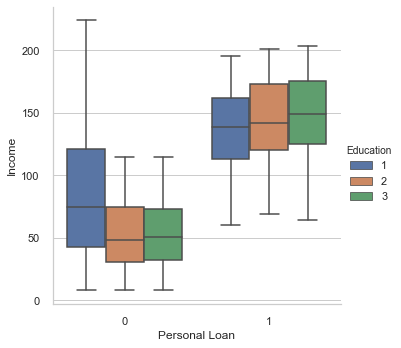

In [831]:
sns.catplot(x="Personal Loan", y="Income", kind="box",hue="Education", data=pdata)

In [832]:
#People with higher income tend to opt for personal loan

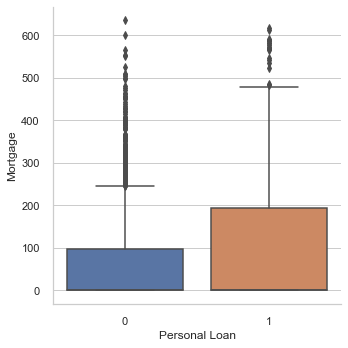

In [833]:
sns.catplot(x="Personal Loan", y="Mortgage", kind="box", data=pdata)

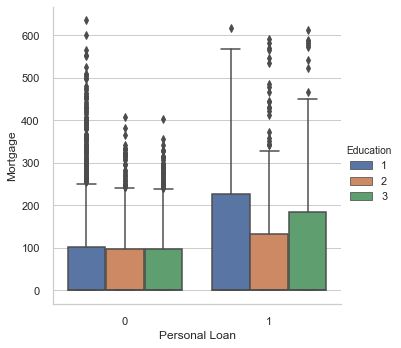

In [834]:
sns.catplot(x="Personal Loan", y="Mortgage", kind="box", hue="Education", data=pdata)

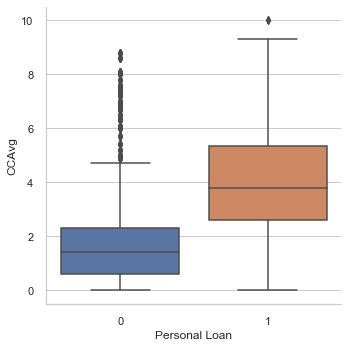

In [835]:
sns.catplot(x="Personal Loan", y="CCAvg", kind="box", data=pdata)

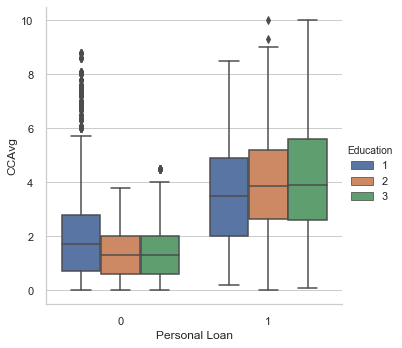

In [836]:
sns.catplot(x="Personal Loan", y="CCAvg", kind="box",hue="Education", data=pdata)

In [837]:
#Customers having higher Credit Card spending tend to opt for Personal Loan

In [838]:
n_true = len(pdata.loc[pdata['Personal Loan'] == 1])
n_false = len(pdata.loc[pdata['Personal Loan'] == 0])
print("Number of customers having Personal Loan: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers not having Personal Loan: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customers having Personal Loan: 480 (9.60%)
Number of customers not having Personal Loan: 4520 (90.40%)


In [839]:
#Data is imbalanced, only 10% of the customers are having Personal loan, 
#so data is biased towards customers not opted for personal loan

In [840]:
(pdata["Personal Loan"].value_counts()/pdata.shape[0])*100

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

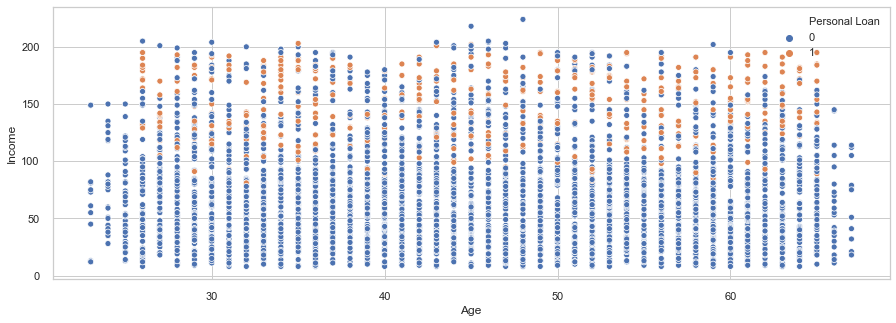

In [841]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=pdata,x="Age",y="Income",hue="Personal Loan")

In [842]:
#Check the column names
pdata.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Categorical columns:  Family, Education, Personal Loan, Securities Loan, CD Account, Online, CreditCard
# Continous columns: Income, CCAvg, Mortgage, 
# Discrete variable column : Age,Experience

In [843]:
# Check value counts for Personal Loan
(pdata["Personal Loan"].value_counts()/pdata.shape[0])*100

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

In [844]:
#Data is imbalanced

In [845]:
#Check missing values
missingValues = pdata.isnull().sum()
print(missingValues)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [846]:
pdata.groupby("Personal Loan").mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [847]:
#Avg experience of customers opting for Personal Loan is less
#Avg Income for customers opting for Personal loan is high
#Avg Credit Card spending of customers opting for Personal Loan is high
#On an average customers opting for Personal Loan are highly educated
# Average Mortgage for customers opting for Personal loan is high
# Deposit Account is also high for customers opting for Personal Loan

Text(0, 0.5, 'Proportion of Customers')

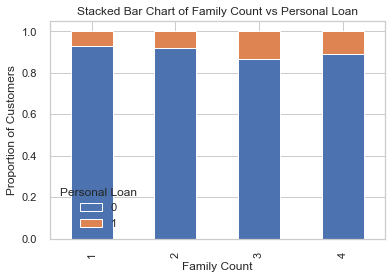

In [848]:
table=pd.crosstab(pdata["Family"],pdata["Personal Loan"])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Family Count vs Personal Loan')
plt.xlabel('Family Count')
plt.ylabel('Proportion of Customers')

There are no missing values in the data.

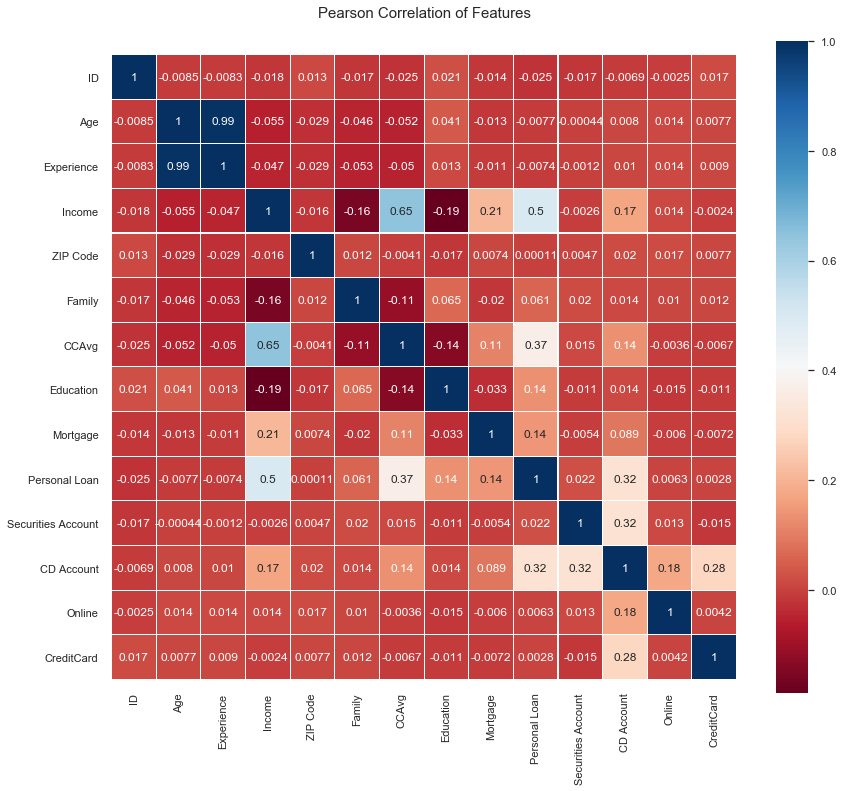

In [849]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(pdata.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

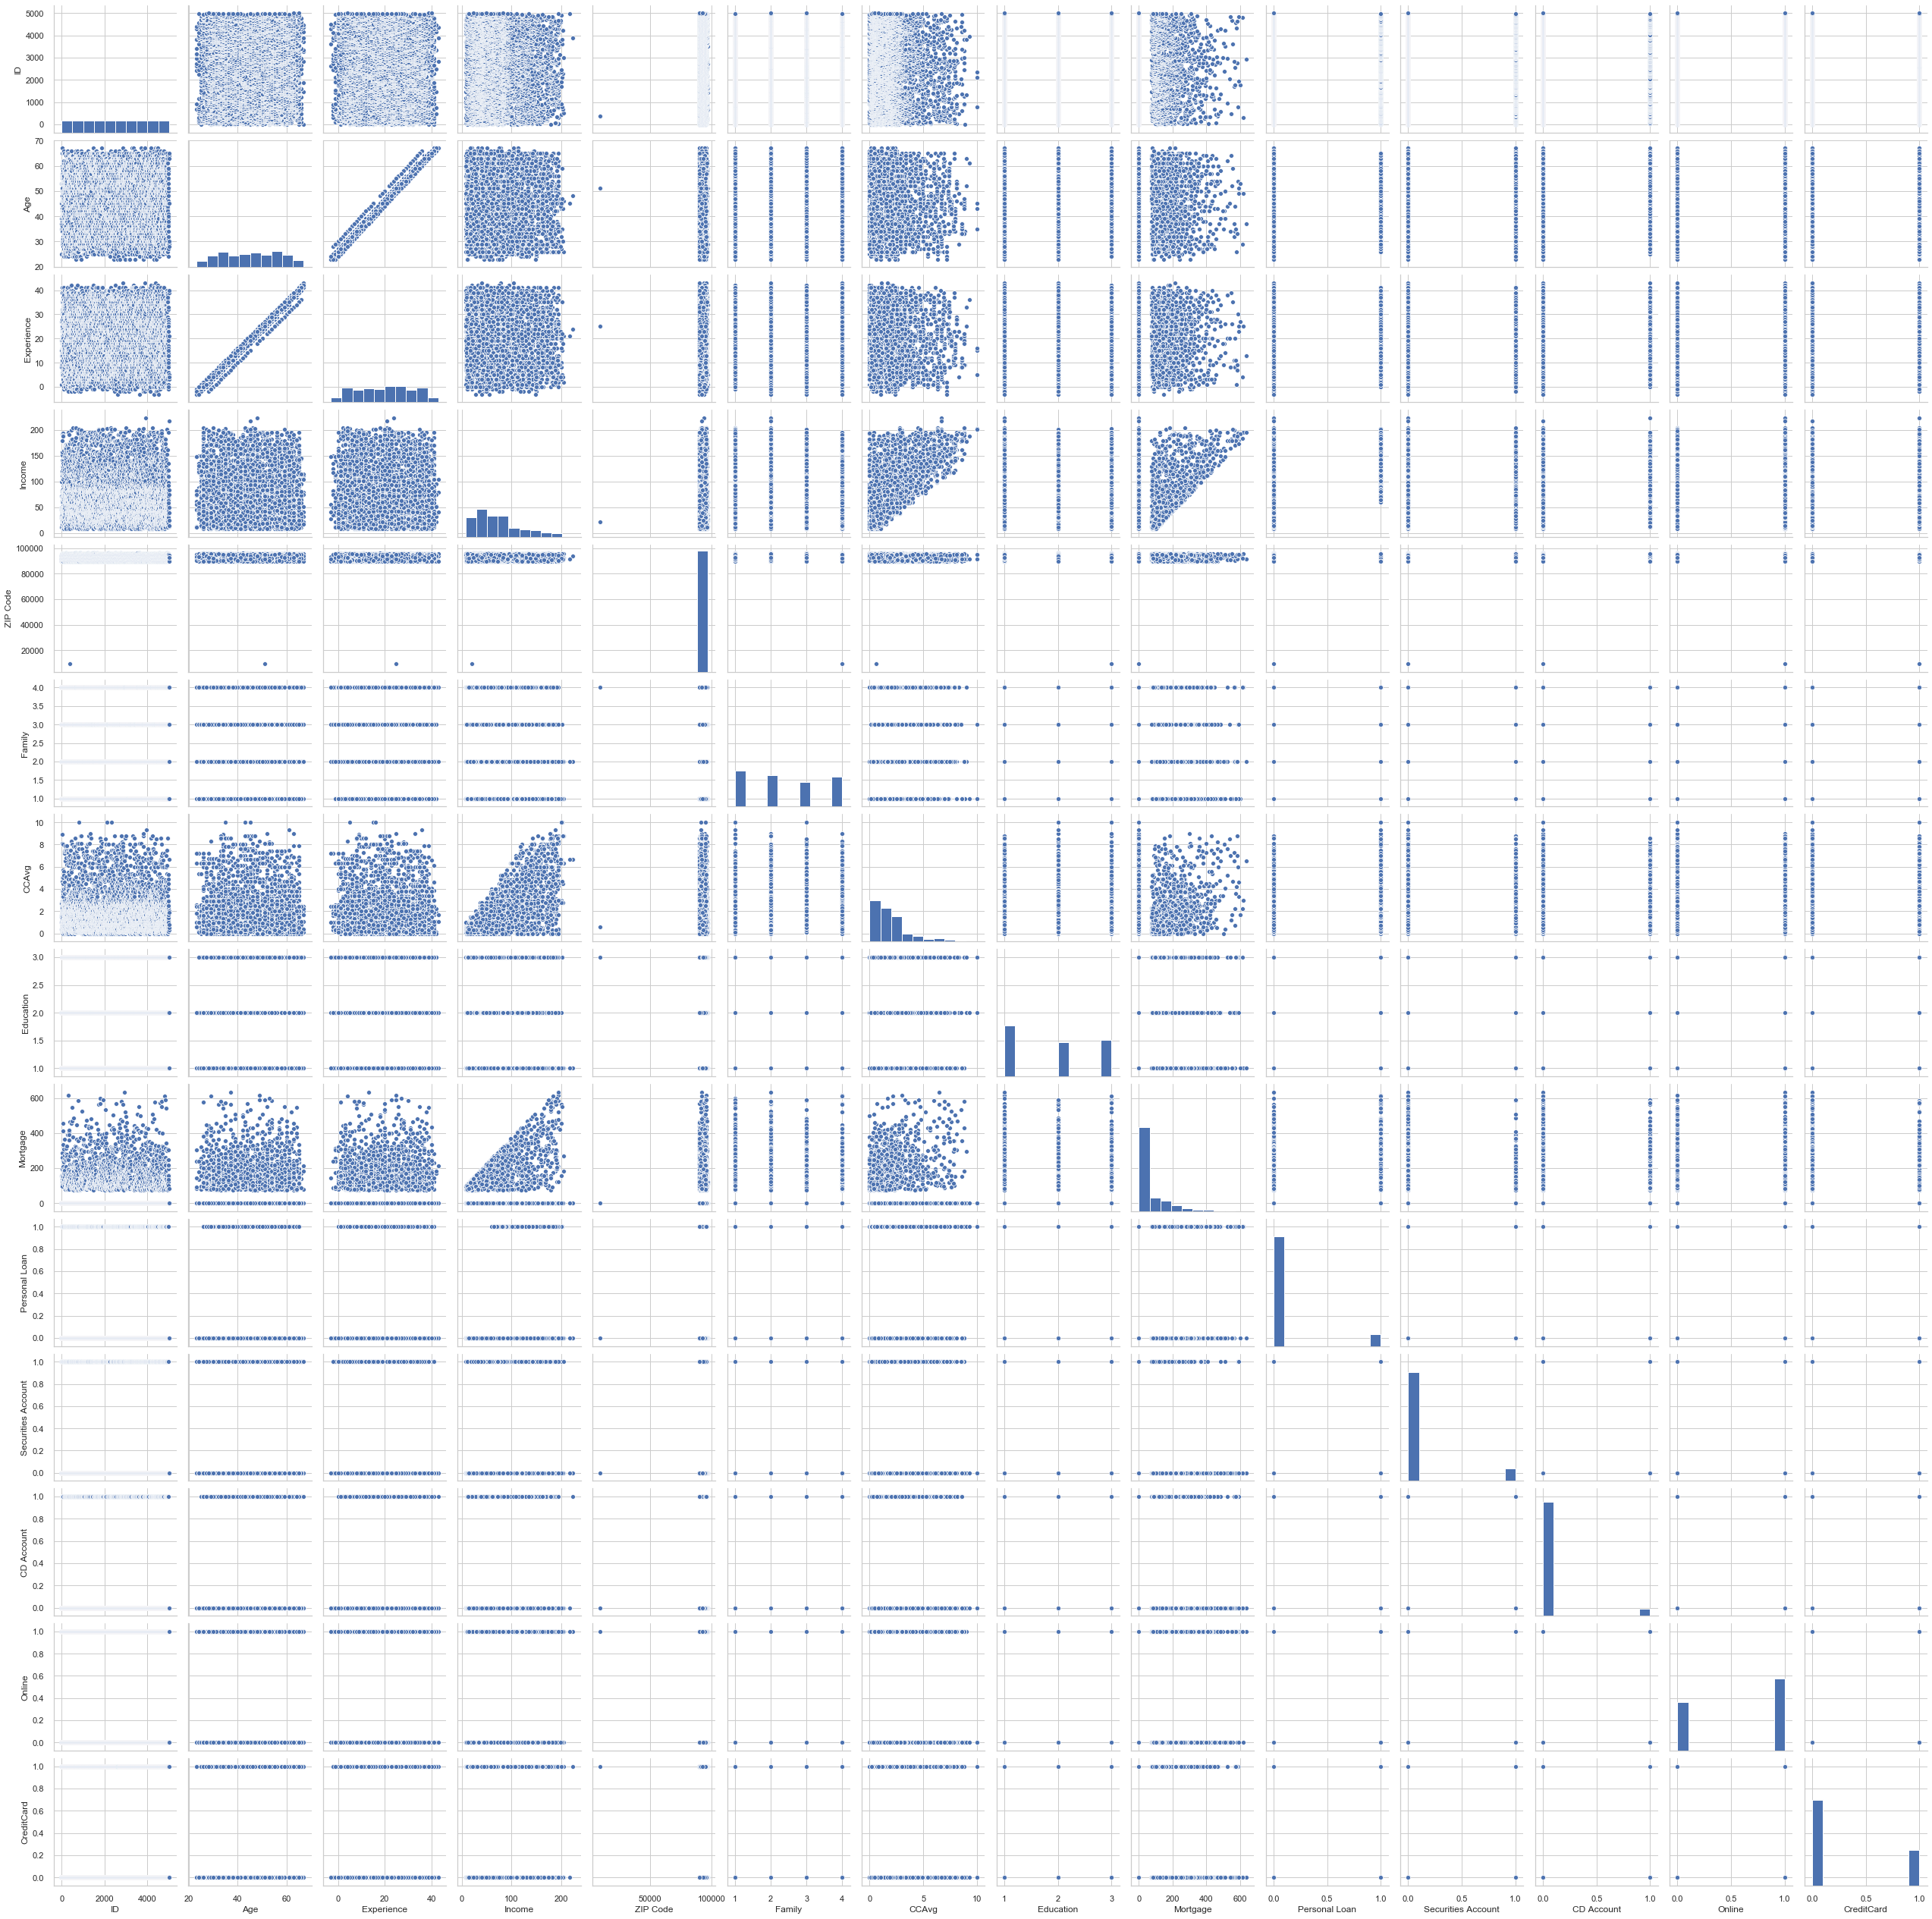

In [850]:
sns.pairplot(pdata,diag_kind='hist')

In [851]:
pdata.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [852]:
#Check skewness

In [853]:
print(pdata['Income'].skew())
pdata['Income'].describe()

0.8413386072610816


count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [854]:
# Income is not skewed

In [855]:
print(pdata['Mortgage'].skew())
pdata['Mortgage'].describe()

2.1040023191079444


count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [856]:
# Mortgage is skewed

In [857]:
print(pdata['CCAvg'].skew())
pdata['CCAvg'].describe()

1.5984433366678663


count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [858]:
# CCAvg is skewed

In [859]:
# Age and Experience is highly correlated

In [860]:
#Online, CreditCard, ZipCode, Age and Experience are not having much relationship with Personal Loan

# Data  Preparation

In [861]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [862]:
pdata['income_per_familyMember'] = pdata['Income']/pdata['Family']

In [863]:
pdata['Income'] = pdata['Income'].astype(float)

In [864]:
pdata['Mortgage'] = pdata['Mortgage'].astype(float)

In [865]:
#pdata.loc[(pdata.Age == 26) & (pdata.Experience ==0), ['Experience']] = 1

In [866]:
pdata

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,income_per_familyMember
0,1,25,1,49.0,91107,4,1.6,1,0.0,0,1,0,0,0,12.250000
1,2,45,19,34.0,90089,3,1.5,1,0.0,0,1,0,0,0,11.333333
2,3,39,15,11.0,94720,1,1.0,1,0.0,0,0,0,0,0,11.000000
3,4,35,9,100.0,94112,1,2.7,2,0.0,0,0,0,0,0,100.000000
4,5,35,8,45.0,91330,4,1.0,2,0.0,0,0,0,0,1,11.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0.0,0,0,0,1,0,40.000000
4996,4997,30,4,15.0,92037,4,0.4,1,85.0,0,0,0,1,0,3.750000
4997,4998,63,39,24.0,93023,2,0.3,3,0.0,0,0,0,0,0,12.000000
4998,4999,65,40,49.0,90034,3,0.5,2,0.0,0,0,0,1,0,16.333333


In [867]:
# Education is an important factor so let's try to take only 2 categories for Education, 1 for UnderGrad and 2 for Higher Education

In [868]:
pdata.loc[(pdata["Education"] == 3), ["Education"]] = 2

In [869]:
#pdata.loc[(pdata["Education"] == 2) & (pdata["Income"] >= pdata.Income.median()), ["IncomeIndex"]] = 1

In [870]:
pdata = pd.get_dummies(pdata, columns=['Family','Education','CD Account','Online','Securities Account','CreditCard'])

In [871]:
pdata.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage',
       'Personal Loan', 'income_per_familyMember', 'Family_1', 'Family_2',
       'Family_3', 'Family_4', 'Education_1', 'Education_2', 'CD Account_0',
       'CD Account_1', 'Online_0', 'Online_1', 'Securities Account_0',
       'Securities Account_1', 'CreditCard_0', 'CreditCard_1'],
      dtype='object')

In [872]:
pdata

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,income_per_familyMember,Family_1,...,Education_1,Education_2,CD Account_0,CD Account_1,Online_0,Online_1,Securities Account_0,Securities Account_1,CreditCard_0,CreditCard_1
0,1,25,1,49.0,91107,1.6,0.0,0,12.250000,0,...,1,0,1,0,1,0,0,1,1,0
1,2,45,19,34.0,90089,1.5,0.0,0,11.333333,0,...,1,0,1,0,1,0,0,1,1,0
2,3,39,15,11.0,94720,1.0,0.0,0,11.000000,1,...,1,0,1,0,1,0,1,0,1,0
3,4,35,9,100.0,94112,2.7,0.0,0,100.000000,1,...,0,1,1,0,1,0,1,0,1,0
4,5,35,8,45.0,91330,1.0,0.0,0,11.250000,0,...,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1.9,0.0,0,40.000000,1,...,0,1,1,0,0,1,1,0,1,0
4996,4997,30,4,15.0,92037,0.4,85.0,0,3.750000,0,...,1,0,1,0,0,1,1,0,1,0
4997,4998,63,39,24.0,93023,0.3,0.0,0,12.000000,0,...,0,1,1,0,1,0,1,0,1,0
4998,4999,65,40,49.0,90034,0.5,0.0,0,16.333333,0,...,0,1,1,0,0,1,1,0,1,0


In [873]:
pdata['CCAvg_income_ratio'] = pdata['CCAvg']/pdata['Income']
pdata['Mortgage_income_ratio'] = pdata['Mortgage']/pdata['Income']

In [874]:
# Using standard scaling of parameters

In [875]:
pdata[['Experience','CCAvg','Income','Mortgage','Family_1', 'Family_2', 'Family_3', 'Family_4',
       'Education_1', 'Education_2', 'CD Account_0',
       'CD Account_1', 'Online_0', 'Online_1', 'Securities Account_0',
       'Securities Account_1', 'CreditCard_0', 'CreditCard_1',
      'CCAvg_income_ratio','Mortgage_income_ratio','income_per_familyMember']] = StandardScaler().fit_transform(pdata[['Experience','CCAvg','Income','Mortgage','Family_1', 'Family_2', 'Family_3', 'Family_4',
       'Education_1', 'Education_2', 'CD Account_0',
       'CD Account_1', 'Online_0', 'Online_1', 'Securities Account_0',
       'Securities Account_1', 'CreditCard_0', 'CreditCard_1','CCAvg_income_ratio','Mortgage_income_ratio','income_per_familyMember']])

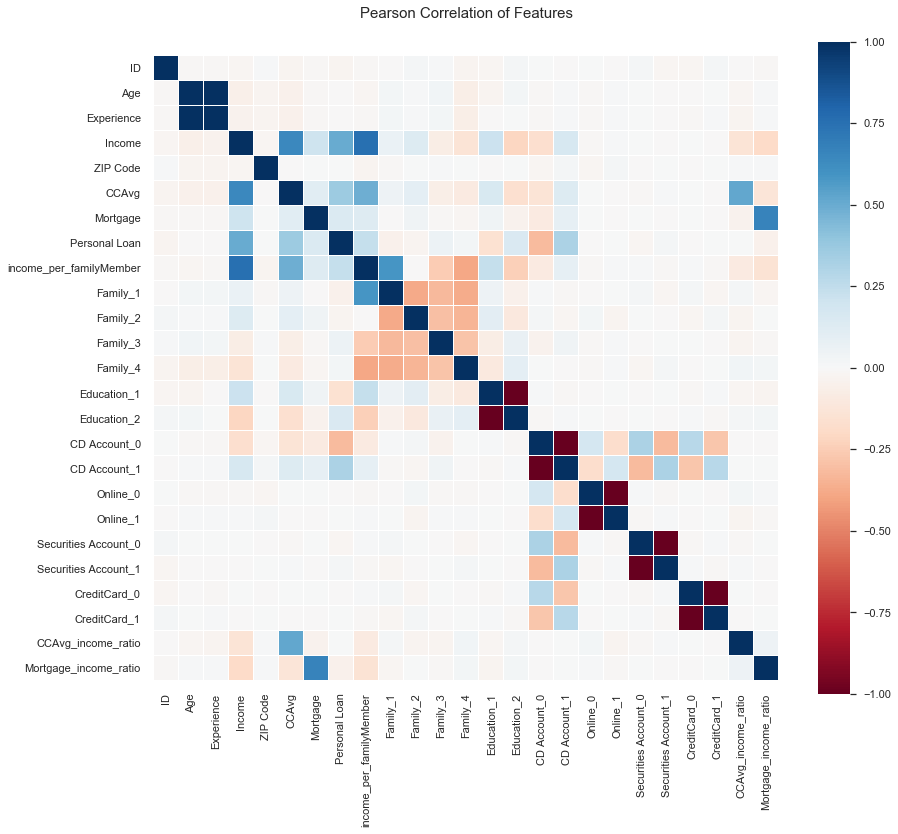

In [876]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(pdata.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white')

In [877]:
# This correlation graph is very interesting, you can see Personal Loan 
# is highly correlated to CD Account 1, Higher Education, Family 3 or 4, Income per Family Member, Mortgare, CCAvg and Income

# Split data into training and test set

In [878]:
#Drop ID and ZipCode as these are not relevent and columns which are dummy encoded
# Age and Experience have less correlation with Personal Loan so dropping it for model training
pdatafinal = pdata.drop(['ID','ZIP Code','Age','Experience'],axis=1)

In [879]:
X = pdatafinal.drop(labels="Personal Loan", axis=1)
y= pdatafinal["Personal Loan"]

In [880]:
from sklearn.model_selection import train_test_split

In [881]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=127)

In [882]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Using Logistic Regression

In [883]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [884]:
#logit_model=sm.Logit(y_train,X_train)
#result=logit_model.fit()
#print(result.summary2())

In [885]:
#Fit the model on train
model = LogisticRegression(solver="liblinear")
result = model.fit(X_train,y_train)

In [886]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [887]:
X_test.shape

(1500, 20)

In [888]:
X_train.shape

(3500, 20)

In [889]:
y_train[y_train==1].count()

342

In [890]:
y_test[y_test==1].count()

138

In [891]:
#predict on test
y_predict = model.predict(X_test)

In [892]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  4.460152 -0.375485  0.251029 -1.896676  0.800357 -0.546934  0.066043   

          7         8         9  ...        11        12        13        14  \
0 -0.352855 -0.947529  0.947529  ...  0.403853  0.147862 -0.147862  0.122369   

         15        16        17       18        19  intercept  
0 -0.122369  0.223632 -0.223632  0.93022 -0.551798  -4.986502  

[1 rows x 21 columns]


In [893]:
logisticScore = model.score(X_test, y_test)
print(logisticScore)

0.966


In [894]:
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict)))

Model Accuracy: 0.9660


# Using kNN

In [895]:
from sklearn.neighbors import KNeighborsClassifier

In [896]:
modelKNN = KNeighborsClassifier(n_neighbors= 39 , weights = 'distance' )

In [897]:
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='distance')

In [898]:
y_predict_knn = modelKNN.predict(X_test)

In [899]:
knnScore = modelKNN.score(X_test,y_test)
print(knnScore)

0.944


In [900]:
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict_knn)))

Model Accuracy: 0.9440


# Using Naive Bayes Classifier

In [901]:
from sklearn.naive_bayes import GaussianNB

In [902]:
modelNBC = GaussianNB()

In [903]:
modelNBC.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [904]:
y_predict_nbc = modelNBC.predict(X_test)

In [905]:
nbcScore = modelNBC.score(X_test,y_test)
print(nbcScore)

0.9086666666666666


In [906]:
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict_nbc)))

Model Accuracy: 0.9087


# Confusion Matrix for Logistic Regression model

In [907]:
def draw_confusion_matrix(y_test,y_predict):
    cm=metrics.confusion_matrix(y_test,y_predict, labels=[1,0])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True,fmt="g",cmap='Blues')

In [908]:
metrics.confusion_matrix(y_test,y_predict, labels=[1,0])

array([[  94,   44],
       [   7, 1355]], dtype=int64)

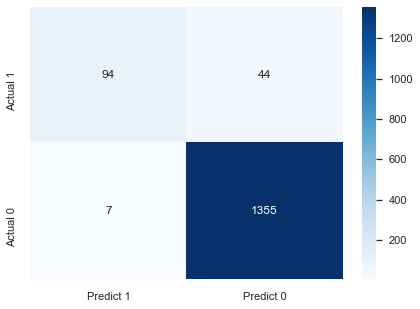

In [909]:
draw_confusion_matrix(y_test,y_predict)

# Confusion Matrix for kNN model

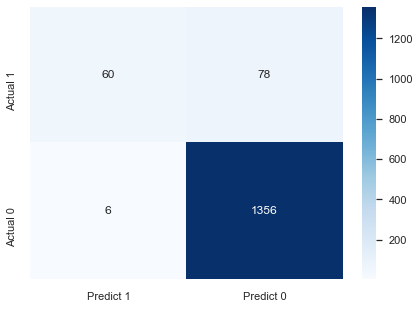

In [910]:
draw_confusion_matrix(y_test,y_predict_knn)

# Confusion matrix for Naive Bayes Classifier

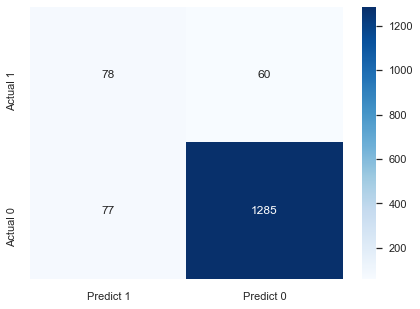

In [911]:
draw_confusion_matrix(y_test,y_predict_nbc)

#Summary of Accuracy of 3 models

In [912]:
data = np.array([logisticScore,knnScore,nbcScore]).T
df = pd.DataFrame(data, index=["Logistic Regression","KNN","NB"], columns=["Accuracy"])
df

,Accuracy
Logistic Regression,0.966000
KNN,0.944000
NB,0.908667


In [913]:
# Since the data is imbalanced, Accuracy is not a good metric to rate the model. Let's go for Precision and Recall

In [914]:
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

In [915]:
# 1. Metrics for Logistic Regression 

In [916]:
print(classification_report(y_test, y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1362
           1       0.93      0.68      0.79       138

    accuracy                           0.97      1500
   macro avg       0.95      0.84      0.88      1500
weighted avg       0.97      0.97      0.96      1500



In [917]:
# 2. Metrics for KNN

In [918]:
print(classification_report(y_test,y_predict_knn, digits=2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1362
           1       0.91      0.43      0.59       138

    accuracy                           0.94      1500
   macro avg       0.93      0.72      0.78      1500
weighted avg       0.94      0.94      0.93      1500



In [919]:
# 3. Metrics for Naive Bayes

In [920]:
print(classification_report(y_test,y_predict_nbc, digits=2))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1362
           1       0.50      0.57      0.53       138

    accuracy                           0.91      1500
   macro avg       0.73      0.75      0.74      1500
weighted avg       0.91      0.91      0.91      1500



In [921]:
## Precision, Recall and F1 Score of Logistic Regression seems promising.

Precision is a metric that quantifies the number of correct positive predictions made
#Precision, therefore, calculates the accuracy for the minority class

In [922]:
## Now we will check ROC curve for all 3 models

# The ROC curve is a useful tool for a few reasons:

# The curves of different models can be compared directly in general or for different thresholds.
# The area under the curve (AUC) can be used as a summary of the model skill.

In [923]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [924]:
#The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. 
#It is a probability curve that plots the TPR against FPR at various threshold values and essentially
#separates the ‘signal’ from the ‘noise’. 

#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish 
#between classes and is used as a summary of the ROC curve.

In [925]:
#Predicting Probabilities

In [926]:
pred_probLR = model.predict_proba(X_test)
pred_probKNN = modelKNN.predict_proba(X_test)
pred_probNB = modelNBC.predict_proba(X_test)

In [927]:
# roc curve for models
fprLR, tprLR, threshLR = roc_curve(y_test, pred_probLR[:,1], pos_label=1)
fprKNN, tprKNN, threshKNN = roc_curve(y_test, pred_probKNN[:,1], pos_label=1)
fprNB, tprNB, threshNB = roc_curve(y_test, pred_probNB[:,1], pos_label=1)

In [928]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [929]:
# auc scores
auc_scoreLR = roc_auc_score(y_test, pred_probLR[:,1])
auc_scoreKNN = roc_auc_score(y_test, pred_probKNN[:,1])
auc_scoreNB = roc_auc_score(y_test, pred_probNB[:,1])

In [930]:
AUCScoreData = np.array([auc_scoreLR,auc_scoreKNN,auc_scoreNB]).T
dfROCAUC = pd.DataFrame(AUCScoreData, index=["Logistic Regression","KNN","Naive Bayes Classifier"], columns=["ROC AUC"])
dfROCAUC

,ROC AUC
Logistic Regression,0.969365
KNN,0.975329
Naive Bayes Classifier,0.931170


# For Logistic Regression the AUC for ROC curve is 0.96

In [931]:
#Plot the curve

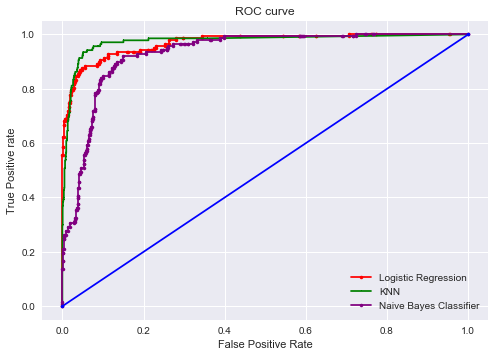

In [932]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fprLR, tprLR, marker='.',color='red', label='Logistic Regression')
plt.plot(fprKNN, tprKNN, marker=',',color='green', label='KNN')
plt.plot(fprNB, tprNB, marker='.',color='purple', label='Naive Bayes Classifier')
plt.plot(p_fpr, p_tpr, marker='.', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# ROC curves should be used when there are roughly equal numbers of observations for each class.
# Precision-Recall curves should be used when there is a moderate to large class imbalance.


In [933]:
# Now since our data is imbalanced we need to check the Precision Recall Curves

In [934]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [935]:
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pred_probLR[:,1])
knn_precision, knn_recall, _ = precision_recall_curve(y_test, pred_probKNN[:,1])
nb_precision, nb_recall, _ = precision_recall_curve(y_test, pred_probNB[:,1])

In [936]:
## PLOT the Precision-Recall Curve

In [937]:
baseline = len(y_test[y_test==1]) / len(y_test)

In [938]:
baseline

0.092

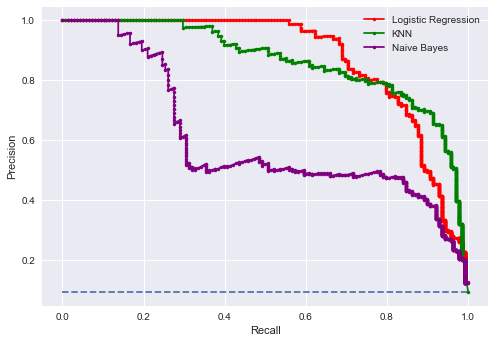

In [939]:
plt.plot([0, 1], [baseline, baseline], linestyle='--')
plt.plot(lr_recall, lr_precision, marker='.',color='red',label='Logistic Regression')
plt.plot(knn_recall, knn_precision, marker='.',color='green', label='KNN')
plt.plot(nb_recall, nb_precision, marker='.',color='purple', label='Naive Bayes')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Precision-recall curves (PR curves) are recommended for highly skewed domains where ROC curves may provide an excessively optimistic view of the performance

In [940]:
# calculate the precision-recall auc
auc_score_LR = auc(lr_recall, lr_precision)
auc_score_KNN = auc(knn_recall, knn_precision)
auc_score_NB = auc(nb_recall, nb_precision)

In [941]:
AUCPRData = np.array([auc_score_LR,auc_score_KNN,auc_score_NB]).T
dfAUC = pd.DataFrame(AUCPRData, index=["Logistic Regression","KNN","Naive Bayes Classifier"], columns=["Precision/Recall AUC"])
dfAUC

,Precision/Recall AUC
Logistic Regression,0.874336
KNN,0.863101
Naive Bayes Classifier,0.599514


# For Logistic Regression the AUC for Precision Recall curve is 0.85

# Checking details for Logistic Regression

In [942]:
model.classes_

array([0, 1], dtype=int64)

In [943]:
model.intercept_

array([-4.98650237])

In [944]:
X_test.head()

,Income,CCAvg,Mortgage,income_per_familyMember,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,CD Account_0,CD Account_1,Online_0,Online_1,Securities Account_0,Securities Account_1,CreditCard_0,CreditCard_1,CCAvg_income_ratio,Mortgage_income_ratio
58,0.417688,-0.994537,-0.555524,0.104155,-0.645936,1.690569,-0.503123,-0.568728,1.177071,-1.177071,0.25354,-0.25354,1.216618,-1.216618,0.341423,-0.341423,0.645314,-0.645314,-1.472244,-0.558710
3204,-0.538229,-0.136160,1.263487,-0.763444,-0.645936,-0.591517,-0.503123,1.758310,-0.849566,0.849566,0.25354,-0.25354,1.216618,-1.216618,0.341423,-0.341423,0.645314,-0.645314,0.401976,1.600414
1474,0.113532,1.065567,-0.555524,-0.073164,-0.645936,1.690569,-0.503123,-0.568728,-0.849566,0.849566,0.25354,-0.25354,-0.821951,0.821951,0.341423,-0.341423,0.645314,-0.645314,1.174127,-0.558710
3206,0.135258,-0.250611,-0.555524,-0.060498,-0.645936,1.690569,-0.503123,-0.568728,-0.849566,0.849566,0.25354,-0.25354,-0.821951,0.821951,0.341423,-0.341423,-1.549632,1.549632,-0.516256,-0.558710
2225,-1.059638,-0.880087,0.575213,-0.915432,-0.645936,-0.591517,-0.503123,1.758310,-0.849566,0.849566,0.25354,-0.25354,1.216618,-1.216618,0.341423,-0.341423,0.645314,-0.645314,-0.674632,2.071920


In [945]:
model.coef_

array([[ 4.4601517 , -0.37548519,  0.25102894, -1.89667571,  0.80035724,
        -0.54693372,  0.0660433 , -0.35285529, -0.9475289 ,  0.9475289 ,
        -0.40385306,  0.40385306,  0.14786181, -0.14786181,  0.12236944,
        -0.12236944,  0.22363208, -0.22363208,  0.93021963, -0.55179753]])

Here we can see the customer opting for Personal loan is highly related to CD Account, Education, Family

# If we use the Weighted Logistic Regression, then let's see if Recall improves for minority class i.e. Customers opting for Personal Loan

In [946]:
w={0:10,1:90}

In [947]:
model_LRW = LogisticRegression(random_state=13, class_weight=w)
model_LRW.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 10, 1: 90}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [948]:
y_predict_lrw = model_LRW.predict(X_test)

In [949]:
print("Weighted Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict_lrw)))

Weighted Model Accuracy: 0.9307


In [950]:
print(classification_report(y_test, y_predict_lrw, digits=2))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1362
           1       0.58      0.89      0.70       138

    accuracy                           0.93      1500
   macro avg       0.78      0.91      0.83      1500
weighted avg       0.95      0.93      0.94      1500



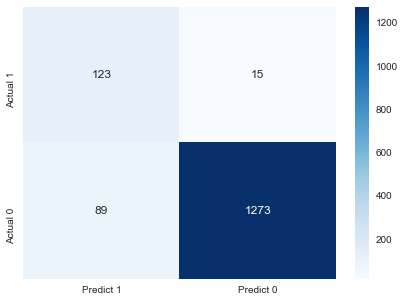

In [951]:
draw_confusion_matrix(y_test,y_predict_lrw)

In [952]:
#Recall is improved but their is decrease in Precision.
#Weighted Logistic Regression improves the estimation of likelihood of customer opting for personal loan

# Best Model is Logistic Regression

In [953]:
#Best Model is Logistic Regression, it has accuracy of 96.6%
#ROC AUC: 0.9693
#Precision/Recall AUC: 0.8743
#........................................................
#Precision for Personal Loan customer: 0.93
#Recall for Personal Loan customer : 0.68
#f1 score for Personal Loan customer: 0.79
#......................................................
#Precision for Non Personal Loan customer: 0.97
#Recall for Non Personal Loan customer : 0.99
#f1 score for Non Personal Loan customer: 0.98
#.....................................................
#Customer opting for Personal loan is highly related to CD Account, Education and Family, Income
# Logistic regression gives good Recall value, since our dataset is imbalanced so comparing the Precision/Recall curve for all the algorithms. Logistic Regression performs better.

Customers having Deposit Account, Family of 3 or 4, Good Income are opting for Personal Loan